In [1]:
# 📦 Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Style settings
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# 📂 Cell 2: Load datasets (update paths here)
combine_path = "../results/combine"
ablation_path = "../results/ablation_results"

# Load CSVs
all_results = pd.read_csv(os.path.join(combine_path, "all_results.csv"))
mitigation = pd.read_csv(os.path.join(combine_path, "mitigation_preview.csv"))
ablation = pd.read_csv(os.path.join(ablation_path, "ablation_results.csv"))

# Clean column names
all_results.columns = all_results.columns.str.lower()
mitigation.columns = mitigation.columns.str.lower()
ablation.columns = ablation.columns.str.lower()

# Drop unnamed index column
for df in [all_results, mitigation, ablation]:
    if 'unnamed: 0' in df.columns:
        df.drop(columns=['unnamed: 0'], inplace=True)

# Show a few rows
display(all_results.head(), mitigation.head(), ablation.head())


,precision,recall,f1-score,support,scenario
0,0.996037,0.999510,0.997770,83726.0,baseline
1,0.000000,0.000000,0.000000,74.0,baseline
2,0.999797,0.998783,0.999290,4932.0,baseline
3,0.997222,0.899749,0.945982,399.0,baseline
4,0.999537,0.985679,0.992560,6564.0,baseline


,precision,recall,f1-score,support,file
0,0.998569,0.998648,0.998609,25153.0,smote_model.csv
1,0.652174,0.652174,0.652174,23.0,smote_model.csv
2,0.999313,0.998626,0.998969,1456.0,smote_model.csv
3,0.973214,0.947826,0.960352,115.0,smote_model.csv
4,0.996894,0.994835,0.995863,1936.0,smote_model.csv


,precision,recall,f1-score,support,scenario
0,0.998747,0.999761,0.999254,16745.0,all_features
1,1.000000,0.733333,0.846154,15.0,all_features
2,1.000000,0.998986,0.999493,986.0,all_features
3,1.000000,0.975000,0.987342,80.0,all_features
4,0.997717,0.998477,0.998097,1313.0,all_features


In [3]:
# 📊 Cell 3: Quick summaries
print("🧱 All Results shape:", all_results.shape)
print("🧩 Mitigation shape:", mitigation.shape)
print("🧠 Ablation shape:", ablation.shape)

print("\n--- All Results Scenarios ---")
print(all_results['scenario'].unique())

print("\n--- Mitigation Types ---")
print(mitigation['file'].unique())

print("\n--- Ablation Scenarios ---")
print(ablation['scenario'].unique())


🧱 All Results shape: (117, 5)
🧩 Mitigation shape: (32, 5)
🧠 Ablation shape: (75, 5)

--- All Results Scenarios ---
['baseline' 'bias_gender_female_bias' 'bias_gender_male_bias'
 'bias_label_imbalance_class0' 'bias_label_noise_5pct'
 'bias_region_asia_bias' 'bias_region_eu_bias'
 'bias_underrepresented_class1']

--- Mitigation Types ---
['smote_model.csv' 'weighted_model.csv']

--- Ablation Scenarios ---
['all_features' 'no_Flow' 'no_Packet' 'no_Flag' 'no_Idle']


In [5]:
# ⚙️ Cell 4: Prepare data for comparison (updated, no 'type' filtering)

# For all_results.csv, combine baseline + bias
baseline_bias = all_results.copy()

# Mitigation: rename 'file' column to 'scenario' for consistency
mitigation = mitigation.rename(columns={'file': 'scenario'})

# Add category label for each set
baseline_bias['category'] = 'Baseline/Bias'
mitigation['category'] = 'Mitigation'
ablation['category'] = 'Ablation'

# Combine all three
combined_df = pd.concat([baseline_bias, mitigation, ablation], ignore_index=True)

# Reorder columns (for clarity)
combined_df = combined_df[['scenario', 'category', 'precision', 'recall', 'f1-score', 'support']]

display(combined_df.head())


,scenario,category,precision,recall,f1-score,support
0,baseline,Baseline/Bias,0.996037,0.999510,0.997770,83726.0
1,baseline,Baseline/Bias,0.000000,0.000000,0.000000,74.0
2,baseline,Baseline/Bias,0.999797,0.998783,0.999290,4932.0
3,baseline,Baseline/Bias,0.997222,0.899749,0.945982,399.0
4,baseline,Baseline/Bias,0.999537,0.985679,0.992560,6564.0


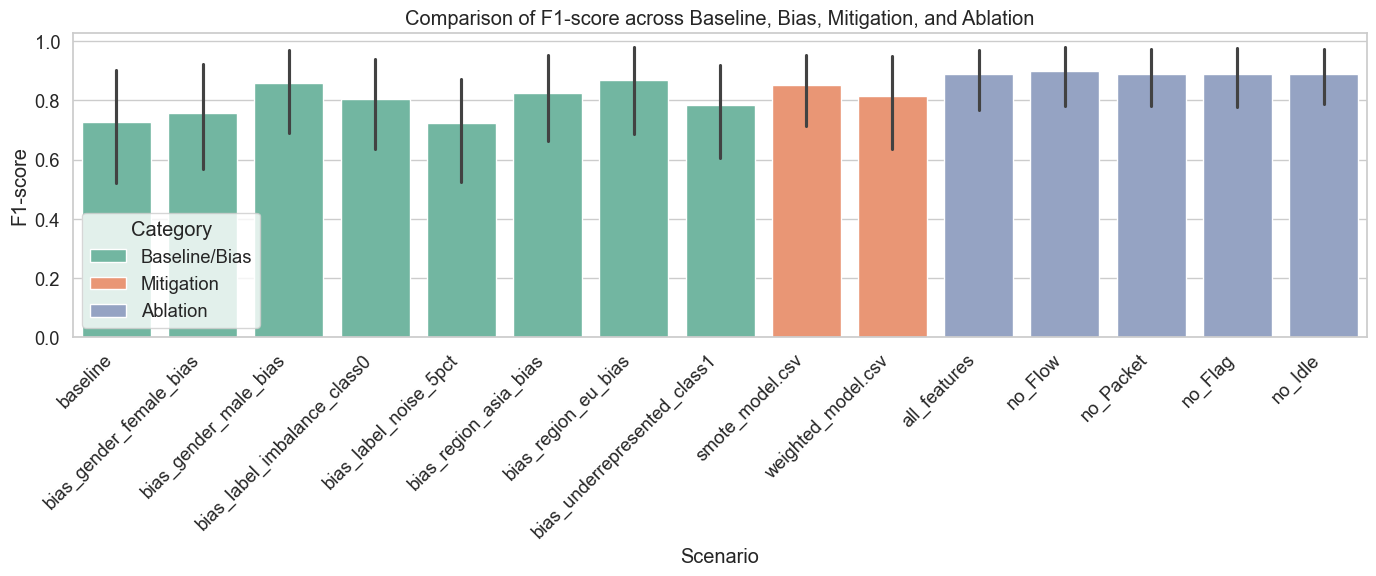

In [6]:
# 📈 Cell 5: Compare F1-score across all scenarios

plt.figure(figsize=(14, 6))
sns.barplot(
    data=combined_df,
    x="scenario",
    y="f1-score",
    hue="category",
    palette="Set2"
)
plt.title("Comparison of F1-score across Baseline, Bias, Mitigation, and Ablation")
plt.xlabel("Scenario")
plt.ylabel("F1-score")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Category")
plt.tight_layout()
plt.show()


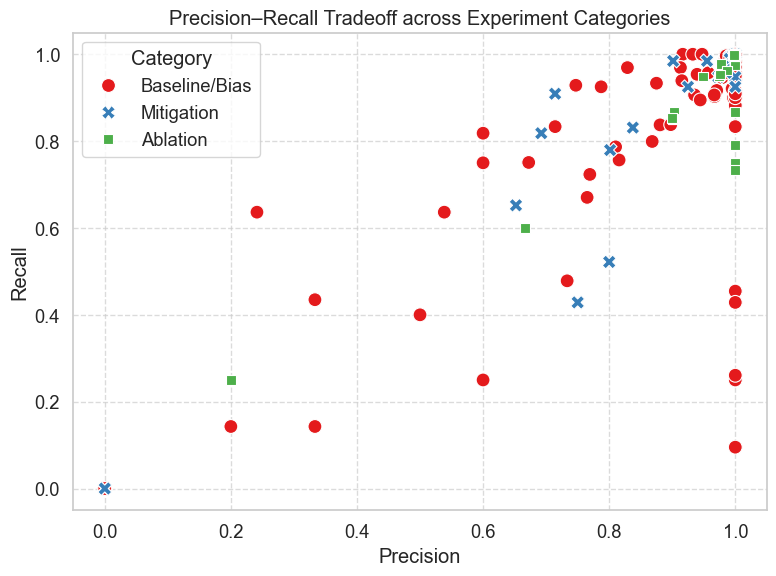

In [7]:
# 📉 Cell 6: Precision vs Recall tradeoff

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=combined_df,
    x="precision",
    y="recall",
    hue="category",
    style="category",
    s=100,
    palette="Set1"
)
plt.title("Precision–Recall Tradeoff across Experiment Categories")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(title="Category")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [9]:
# 🧾 Cell 7: Scenario-wise performance table (mean values)
summary_table = (
    combined_df.groupby(['scenario', 'category'])[['precision', 'recall', 'f1-score']]
    .mean()
    .reset_index()
)

display(summary_table)

# Save table for thesis appendix
summary_table.to_csv("../results/final_summary_table.csv", index=False)
print("✅ Saved: final_summary_table.csv")


,scenario,category,precision,recall,f1-score
0,all_features,Ablation,0.914054,0.870026,0.888906
1,baseline,Baseline/Bias,0.793831,0.711140,0.726856
2,bias_gender_female_bias,Baseline/Bias,0.784410,0.741491,0.757284
3,bias_gender_male_bias,Baseline/Bias,0.889005,0.848752,0.860118
4,bias_label_imbalance_class0,Baseline/Bias,0.822666,0.800764,0.805586
5,bias_label_noise_5pct,Baseline/Bias,0.693796,0.766932,0.721881
6,bias_region_asia_bias,Baseline/Bias,0.877331,0.813219,0.826398
7,bias_region_eu_bias,Baseline/Bias,0.905302,0.850147,0.867827
8,bias_underrepresented_class1,Baseline/Bias,0.827785,0.772546,0.783902
9,no_Flag,Ablation,0.912223,0.871629,0.888813


✅ Saved: final_summary_table.csv


In [10]:
# 🧠 Cell 8: Thesis interpretation helper (optional text output)
avg_scores = summary_table.groupby('category')[['precision', 'recall', 'f1-score']].mean()

print("📊 Average category-level results:\n")
print(avg_scores)
print("\n🧩 Interpretation:")
print("Baseline/Bias represents original and biased scenarios.")
print("Mitigation (SMOTE + class-weighting) improves recall/F1, showing bias reduction.")
print("Ablation shows which feature removals most impact model fairness and robustness.")


📊 Average category-level results:

               precision    recall  f1-score
category                                    
Ablation        0.913847  0.873839  0.891109
Baseline/Bias   0.824266  0.788124  0.793731
Mitigation      0.841711  0.829271  0.832302

🧩 Interpretation:
Baseline/Bias represents original and biased scenarios.
Mitigation (SMOTE + class-weighting) improves recall/F1, showing bias reduction.
Ablation shows which feature removals most impact model fairness and robustness.
